In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import kitcolors as kit

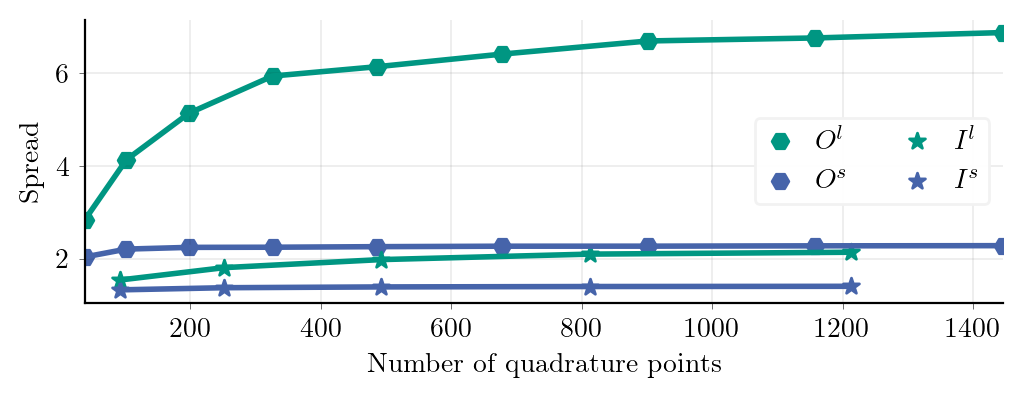

In [2]:
plt.style.use("kitish")
fig, ax = plt.subplots()
ax.set_xlabel("Number of quadrature points")
ax.set_ylabel("Spread")
#ax.set_xlim([0,np.max(nqs)+10])
#ax.set_title("Spread of quadrature weights for the\n {} quadrature of varying order.".format(quadname))


for qtype,marker in zip([2,3], ["H","*"]):
    for itype ,color in zip(["l","s"],[kit.green,kit.blue]):
        weightvar = []
        nqs = []
        for i in range(4,21,2):
            w = np.loadtxt("{}_{}_{}_weights.txt".format(i,qtype,itype))
            if len(w)< 1500:
                weightvar.append(np.max(w)/np.min(w))
                nqs.append(len(w)) 
        label = "$" + "{}^{}".format("O" if qtype==2 else "I", itype) + "$"
        ax.plot(nqs,weightvar,color = color)
        ax.scatter(nqs,weightvar,color = color,marker=marker,label = r"{}".format(label))
plt.legend(ncol=2)

In [3]:
for order,nq,err in zip(orders,nqs,1
                    * np.abs(weightvar)):
    if order == 20:
        ax.text(nq,err-1.500011,"Order $={}$".format(int(order)),horizontalalignment="center")
    else:
        if order <19:
            ax.text(nq,err+1.000051,"${}$".format(int(order)),horizontalalignment="center")#,color=kit.orange)
        else:
            ax.text(nq,err-+1.500011,"${}$".format(int(order)),horizontalalignment="center")#,color=kit.orange)
plt.savefig("{}_weightratio.pdf".format(quadname))


NameError: name 'orders' is not defined

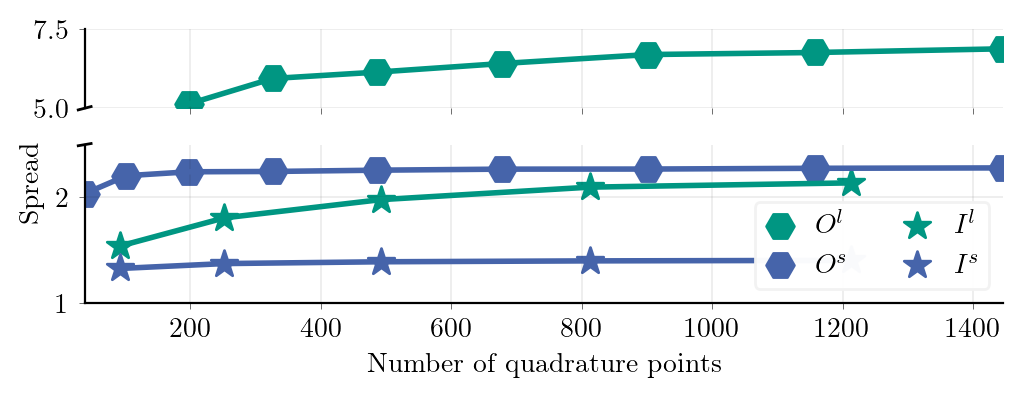

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("kitish")
f, (ax, ax2) = plt.subplots(2, 1, sharex=True,gridspec_kw={'height_ratios': [1,2]},constrained_layout=True)

# plot the same data on both axes


for qtype,marker in zip([2,3], ["H","*"]):
    for itype ,color in zip(["l","s"],[kit.green,kit.blue]):
        weightvar = []
        nqs = []
        for i in range(4,21,2):
            w = np.loadtxt("{}_{}_{}_weights.txt".format(i,qtype,itype))
            if len(w)< 1500:
                weightvar.append(np.max(w)/np.min(w))
                nqs.append(len(w)) 
        label = "$" + "{}^{}".format("O" if qtype==2 else "I", itype) + "$"
        ax.plot(nqs,weightvar,color = color)
        ax.scatter(nqs,weightvar,color = color,marker=marker,s=100,label = r"{}".format(label))

for qtype,marker in zip([2,3], ["H","*"]):
    for itype ,color in zip(["l","s"],[kit.green,kit.blue]):
        weightvar = []
        nqs = []
        for i in range(4,21,2):
            w = np.loadtxt("{}_{}_{}_weights.txt".format(i,qtype,itype))
            if len(w)< 1500:
                weightvar.append(np.max(w)/np.min(w))
                nqs.append(len(w)) 
        label = "$" + "{}^{}".format("O" if qtype==2 else "I", itype) + "$"
        ax2.plot(nqs,weightvar,color = color)
        ax2.scatter(nqs,weightvar,color = color,marker=marker,s=100,label = r"{}".format(label))
ax2.legend(ncol=2,loc="lower right")

# zoom-in / limit the view to different portions of the data
ax.set_ylim(5,7.5)  # outliers only
ax2.set_ylim(1, 2.5)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
#ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .007  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes,zorder = 100,lw = 1, color=kit.black, clip_on=False)
ax.plot((-d, +d), (-3*d, +3*d), **kwargs)        # top-left diagonal
#ax.plot((1 - d, 1 + d), (0,0), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 -d, 1 +d),**kwargs)  # bottom-left diagonal
#ax2.plot((1 - d, 1 + d), (1 , 1 ), **kwargs)  # bottom-right diagonal

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'
ax2.set_xlabel("Number of quadrature points")
ax2.set_ylabel("Spread",horizontalalignment="left")
plt.show()
ax.set_title("Spread of quadrature weights for the\n $O_N^l$, $O_N^s$, $I_N^l$, and $I_N^s$ quadratures of varying order.",
             pad = 10)
f.savefig("octaico.pdf")